# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 2. Библиотеки `pandas` и `matplotlib`

**Что куда присылать?**
* Код по задачам 1-3 в Яндекс.Контест. Ссылка будет отправлена каждому через бот.
* Отчет (задача 4) в формате `pdf` на русском языке телеграм-боту `@miptstats_ds23_bot`. 
* Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так.
* Ноутбук никуда отправлять не нужно.
* Работы, присланные иным способом, не принимаются.

**Правила, <font color="red">прочитайте внимательно</font>:**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2. При подготовке графиков к отчету используйте также библиотеку `seaborn`.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 20 баллов 
* Задача 4 &mdash; 40 баллов 

---

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Прочитайте условие задачи в системе Яндекс.Контест. Для отправки решения вам нужно заполнить пропуски в следующем классе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import typing as tp
from matplotlib.axes import Axes


class CatExam:
    def __init__(self, path_to_df: str="cat_exam_data.csv"):  # task0
        self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
        return self.df.head(5)
    
    def task2(self) -> tp.List[str]:
        return self.df.isna().mean()[self.df.isna().mean() > 0].index.tolist()

    def task3(self) -> pd.DataFrame:
        self.df = self.df.dropna(how='any')
        return self.df
    
    def task4(self) -> pd.DataFrame:
        self.task3()
        return self.df.describe()
    
    def task5(self) -> int:
        self.task3()
        return (self.df.test_score == 100).sum(axis=0)
    
    def task6(self) -> pd.DataFrame:
        self.task3()
        rslt = self.df.copy()
        rslt['cnt_100'] = self.df['test_score'] == 100
        rslt = rslt.groupby('school').aggregate({'number_of_students' : 'first',
                                                 'cnt_100' : 'sum'})
        rslt = rslt.sort_values(by=['cnt_100', 'school'], ascending=False)
        rslt = rslt.reset_index()
        return rslt[rslt['cnt_100'] > 0]

    def task7(self) -> pd.DataFrame:
        self.task3()
        rslt = self.df.copy()
        rslt = rslt.groupby('school')
        rslt = rslt.aggregate({'test_score' : 'mean',
                         'number_of_students' : 'first'}).reset_index()
        rslt = rslt.sort_values(by=['test_score'], ascending=False).head(10)
        return rslt.reset_index(drop=True)

    def task8(self) -> pd.DataFrame:
        self.task3()
        rslt = self.df.copy()
        rslt = rslt.groupby('school')
        rslt = rslt.aggregate({'test_score' : 'mean',
                         'number_of_students' : 'first'}).reset_index()
        rslt = rslt.sort_values(by=['test_score'], ascending=False).tail(10)
        return rslt.reset_index(drop=True)

    def task9(self) -> Axes:
        self.task3()
        sml_schls = self.df[self.df['number_of_students'] <= 1000]
        sml_schls = sml_schls.reset_index(drop=True)
        big_schls = self.df[self.df['number_of_students'] > 1000]
        big_schls = big_schls.reset_index(drop=True)

        fig, ax = plt.subplots()
        plt.title('Гистограмма оценок ЕКЭ')

        ax.set_xlabel('Оценка')
        ax.set_ylabel('Количество учеников')

        plt.hist(big_schls['test_score'], bins=10, alpha = 0.5,
                 label='Большие школы')
        plt.hist(sml_schls['test_score'], bins=10, alpha = 0.5,
                 label='Небольшие школы')
        ax.legend(fontsize = 9)
        return plt.gca()

Решение вы можете выполнить в данном ноутбуке, поочередно выполняя каждый пункт.

In [2]:
p = CatExam()

# p.df
# p.task1()
# p.task2()
# p.task3()
# p.task4()
# p.task5()
# p.task6()
# p.task7()
# p.task8()
# p.task9()

Отчет по задаче присылать не нужно.

---

### Задача 2.

Прочитайте условие задачи в системе Яндекс.Контест. Для отправки решения вам нужно заполнить пропуски в следующем классе.

In [3]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp


class YouTube:
    def __init__(self, path_to_df: str = "RUvideos_short.csv"):  # task0
        self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
        rslt = self.df.copy()
        rslt['trending_date'] = pd.to_datetime(rslt['trending_date'],
                                               format="%y.%d.%m")
        return rslt

    def task2(self) -> pd.DataFrame:
        self.df = self.task1()
        self.df = self.df[['trending_date', 'category_id', 'views', 'likes',
                     'dislikes', 'comment_count']]
        rslt = self.df.copy()
        rslt['trending_date'] = self.df['trending_date'].apply(lambda x: x.day)

        return rslt

    def task3(self) -> Figure:
        sns.boxplot(data=self.df, y='views', x='trending_date', orient='v')
        plt.title('Распределение просмотров в разные дни месяца')
        plt.xlabel('День')
        plt.ylabel('Количество просмотров')
        return plt.gcf()

    def task4(self) -> Figure:
        with sns.plotting_context("notebook"), sns.axes_style("whitegrid"):
            fig, ax = plt.subplots(figsize=(17, 8))
            sns.set (font_scale=2)
            self.df['trending_date'] = pd.to_datetime(self.df['trending_date'],
                                                      format="%y.%d.%m").dt.day
            self.df = self.df.loc[self.df.views < 300000]
            sns.boxplot(data=self.df, y='views', x='trending_date', orient='v')
            plt.title('Распределение числа просмотров в разные дни')
            plt.xlabel('День', fontsize=18)
            plt.ylabel('Число просмотров', fontsize=18)
        return plt.gcf()

    def task5(self) -> Figure:
        with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):   # Исправил фон joinplot'ов
            d = sns.jointplot(data=self.df, x='views', y='likes', alpha=0.3)
            d.fig.suptitle('Распределение просмотров и лайков')
            d.fig.tight_layout()
            d.ax_joint.set_xlabel('Просмотры')
            d.ax_joint.set_ylabel('Лайки')
        return plt.gcf()

    def task6(self) -> Figure:
        with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):   # Исправил фон joinplot'ов
            self.df = self.df.loc[self.df.views < 0.1 * (10**6)]
            self.df = self.df.loc[self.df.likes < 3000]
            d = sns.jointplot(data=self.df, x='views', y='likes', alpha=0.5)
            d.fig.suptitle('Распределение просмотров и лайков')
            d.fig.tight_layout()
            d.ax_joint.set_xlabel('Просмотры')
            d.ax_joint.set_ylabel('Лайки')
        return plt.gcf()

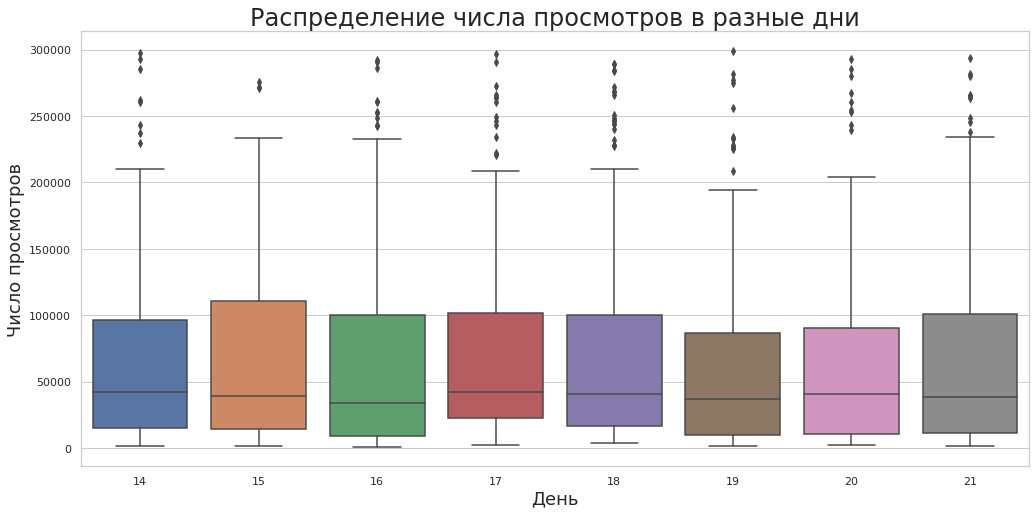

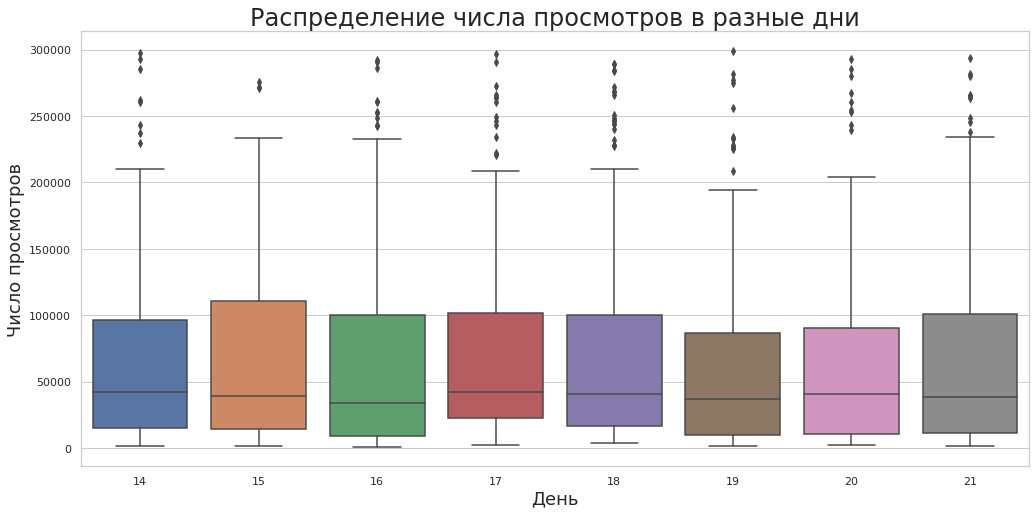

In [4]:
p = YouTube()
p.task4()

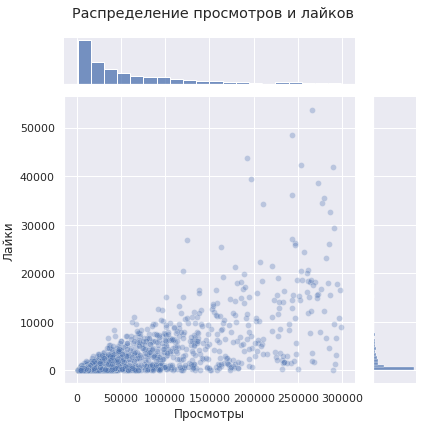

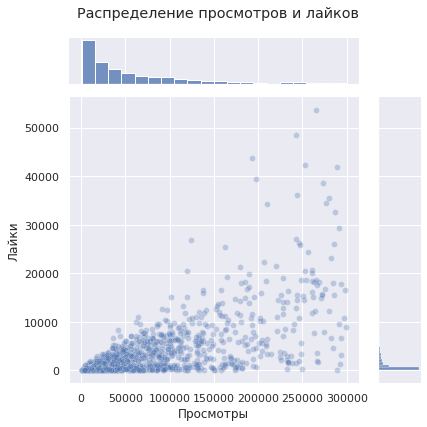

In [5]:
p.task5()

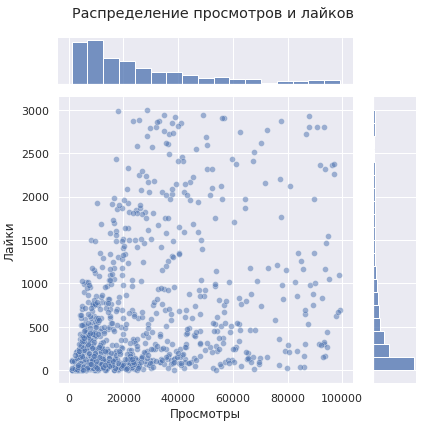

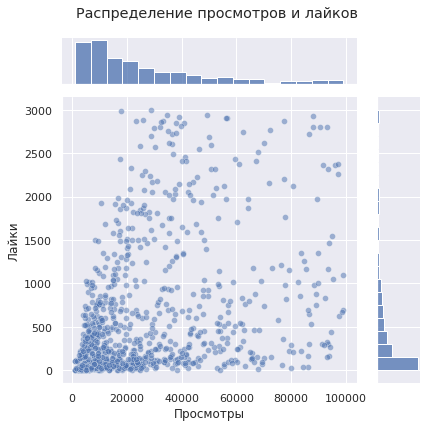

In [6]:
p.task6()

Решение вы можете выполнить в данном ноутбуке, поочередно выполняя каждый пункт.

По задаче нужно прислать отчет, см. задачу 4.

---



### <font color="orange"><i>Сложная часть</i></font>


### Задача 3.

Прочитайте условие задачи в системе Яндекс.Контест. Для отправки решения вам нужно заполнить пропуски в следующем классе.

In [39]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__(  # task0
        self,
        trends_df_path: str="RUvideos_short.csv",
        categories_df_path: str="RU_category_id.json"
    ):
        self.trends_df =  pd.read_csv(trends_df_path)

        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)
            
        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
                {'id': int(item['id']),
                'name': item['snippet']['title']},
                ignore_index=True
            )
            
        self.categories_df['id'] = self.categories_df['id'].astype(int)


    def task1(self) -> pd.DataFrame:
        self.trends_df['trending_date'] = pd.to_datetime(self.trends_df['trending_date'],
                                               format="%y.%d.%m")        
        return self.trends_df.merge(self.categories_df, left_on='category_id',
                                    right_on='id')
    

    def task2(self) -> pd.DataFrame:
        p = self.task1().copy()
        p['trending_date'] = p['trending_date'].apply(lambda x: x.day)

        return pd.pivot_table(p, index='name', columns='trending_date',
                              values='views', aggfunc='sum')


    def task3(self) -> Figure:
        fig, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(self.task2() / 10 ** 6, annot=True, vmin=0, vmax=13,
                    cmap='coolwarm', linewidths= .1)
        plt.title('Тепловая карта просмотров по категориям, млн')
        plt.xlabel('День')
        plt.ylabel('Категория')
        return plt.gcf()


    def task4(self) -> pd.DataFrame:
        p = self.task1().copy()
        p['trending_date'] = p['trending_date'].apply(lambda x: x.day)
        return pd.pivot_table(p, index='name', columns='trending_date',
                              values='views', aggfunc='sum', margins=True,
                              margins_name='Σ')

    def task5(self) -> Figure:
        fig, ax = plt.subplots(figsize=(10, 10))
        sns.heatmap(self.task4() / 10 ** 6, annot=True, vmin=0.01, vmax=12, 
                   cmap='magma', linewidths= .1, robust=True, center=6)
        plt.title('Тепловая карта просмотров по категориям, млн')
        plt.xlabel('День')
        plt.ylabel('Категория')
        return plt.gcf()

Решение вы можете выполнить в данном ноутбуке, поочередно выполняя каждый пункт.

In [40]:
p = YouTube2()

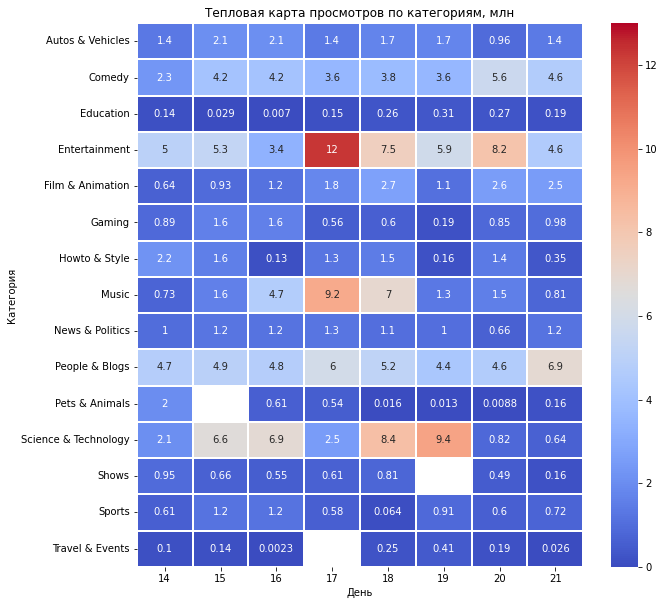

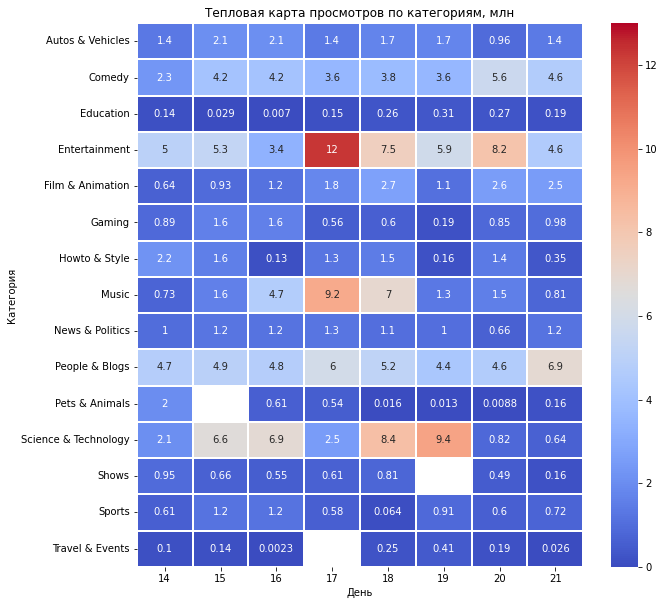

In [41]:
p.task1()
p.task2()
p.task3()

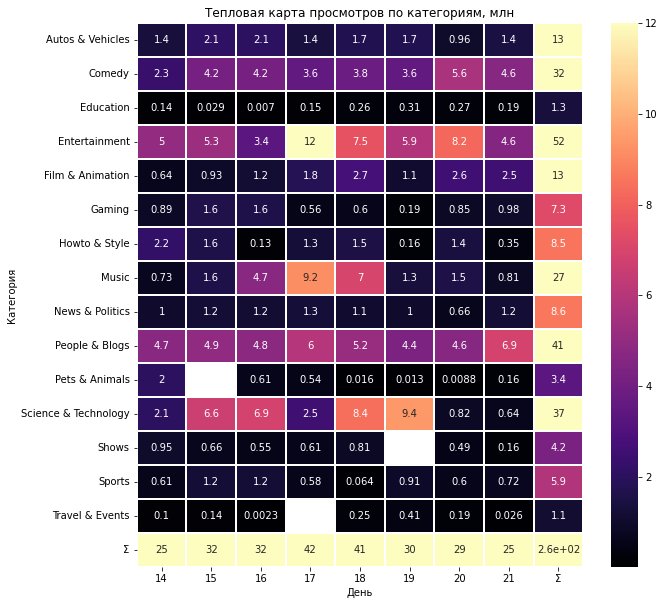

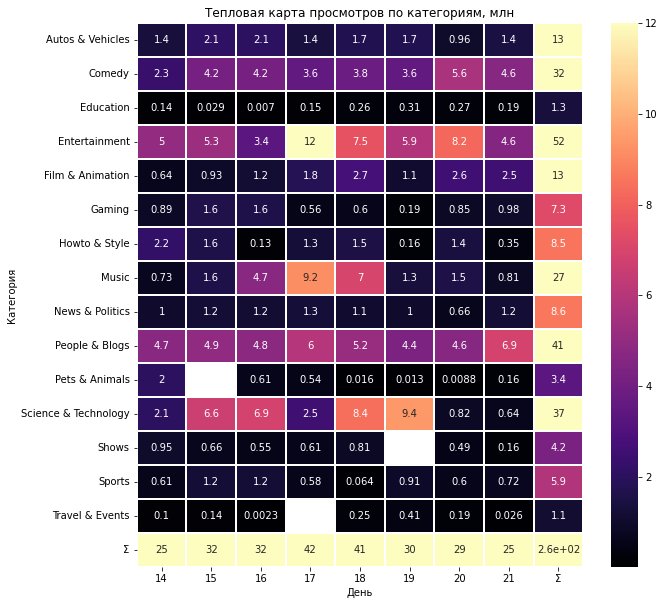

In [42]:
p.task4()
p.task5()

По задаче нужно прислать отчет, см. задачу 4.

---

### Задача 4.


По задачам 2-3 сохраните все необходимые графики, проследив за их информативностью и эстетичностью. Оформите проведенное исследование в pdf-файл, в котором будут:
* краткая постановка каждой задачи (1-2 предложения);
* все необходимые графики с кратким описанием;
* выводы.

Выводы должны быть достаточно краткими, но емкими. Не нужно специально "доливать воды", но и выводы-отписки не лучше. Никакой код размещать в pdf не нужно.